# K-Means Clustering

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

We will work on Iris Dataset from sklearn package.

The Iris dataset consists of measurements of sepals and petals of 3 different plant species:

1. Iris setosa
2. Iris versicolor
3. Iris virginica

Each characteristic we are interested in is a feature. 

For example, petal length is a feature of this dataset.

The features of the dataset are:

1. Column 0: Sepal length
2. Column 1: Sepal width
3. Column 2: Petal length
4. Column 3: Petal width

Now will load the dataset

In [2]:
#Load Data and print
iris = datasets.load_iris()

print(iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [3]:
#The iris.target values give the ground truth for the Iris dataset. 
#Ground truth, in this case, is the number corresponding to the flower that we are trying to learn.
# take a look at the target values
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [4]:
#Read the description of the data
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

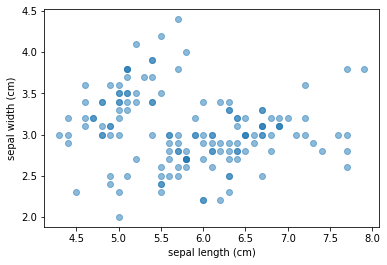

In [6]:
#Next step is to visualize the data
# we create a 2D scatterplot using two of its features sepal length(col 0) Vs petal length(col2)
# add alpha=0.5 - It makes some points look darker than others. The darker spots is where there is an overlap.

samples = iris.data

# x contains all the sepal length and y contains the sepal width
x = samples[: , 0]
y = samples[: , 1]
 
plt.scatter(x, y, alpha=0.5)
 
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
 
plt.show()

# What is K-Means

The K-Means algorithm:

1. Place k random centroids for the initial clusters.
2. Assign data samples to the nearest centroid.
3. Update centroids based on the above-assigned data samples.

 & Repeat Steps 2 and 3 until convergence.

As there are three clusters for 3 -species of teh flower, let’s implement K-Means where the k is 3.

Using the NumPy library, we will create three random initial centroids and plot them along with our samples.

[[6.02850566 2.00730539]
 [6.37825647 2.58635015]
 [5.73210421 3.38489782]]


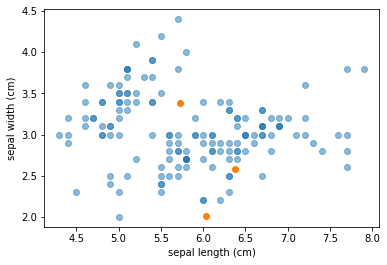

In [8]:
# Use k=3

k = 3
 
centroids_x = np.random.uniform(min(x), max(x), size=k)
centroids_y = np.random.uniform(min(y), max(y), size=k)
 
centroids = np.array(list(zip(centroids_x, centroids_y)))
print(centroids)
 
plt.scatter(x, y, alpha=0.5)
plt.scatter(centroids_x, centroids_y)
 
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
 
plt.show()

In [10]:
# assign data samples to the nearest centroid
# here we will using the distance formula, iterate through the data samples,
#then calculate the distance of each datapoint to each of the three centroids
# in addition to that we use argmin(distances), that would return index of the lowest distance

x = samples[:,0]
y = samples[:,1]

sepal_length_width = np.array(list(zip(x, y)))

def distance(a, b):
    one = (a[0] - b[0]) ** 2
    two = (a[1] - b[1]) ** 2
    distance = (one+two) ** 0.5
    return distance
    
# create an array using numpy called labels of the size of samples and another array distances of the size k

# cluster label for each point
labels = np.zeros(len(samples))

# Distances to each centroid
distances = np.zeros(k)

# We iterate through each data in the sample

for i in range(len(samples)):
    distances[0] = distance(sepal_length_width[i], centroids[0])
    distances[1] = distance(sepal_length_width[i], centroids[1])
    distances[2] = distance(sepal_length_width[i], centroids[2])
    cluster = np.argmin(distances) # minimum of the three distances
    labels[i] = cluster

# print the labels
print(labels)

[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2.
 2. 2. 1. 1. 1. 0. 1. 2. 2. 0. 1. 2. 0. 2. 0. 1. 2. 1. 2. 1. 0. 0. 2. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 2. 2. 1. 1. 2. 0. 0. 1. 1. 0. 2. 2.
 2. 1. 0. 2. 2. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 0. 2. 1. 1. 1. 1. 0.
 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 2. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 2. 2.]


In [14]:
# Update centroids based on the above-assigned data samples.
from copy import deepcopy
# save the old centroids before updating

centroids_old = deepcopy(centroids)

# create a for loop that iterates k times, we can calculate the mean of the points that have the same cluster label.
# create an array named points where we get all the data points that have the cluster label i.

#A deep copy constructs a new compound object and then, recursively, inserts copies into it of the objects found in the original.

for i in range(k):
    points = []
    for j in range(len(sepal_length_width)):
        if labels[j] == i:
            points.append(sepal_length_width[j])
    centroids[i] = np.mean(points, axis=0)

print(centroids_old)
print(centroids)


[[6.02850566 2.00730539]
 [6.37825647 2.58635015]
 [5.73210421 3.38489782]]
[[5.45       2.36875   ]
 [6.61269841 2.94761905]
 [5.24929577 3.30985915]]


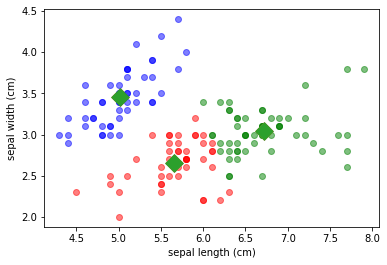

In [15]:
# Now we iterate till the centroids stabilize
#step1 - we create an array error
error = np.zeros(3)

error = np.zeros(3)
error[0] = distance(centroids[0], centroids_old[0])
error[1] = distance(centroids[1], centroids_old[1])
error[2] = distance(centroids[2], centroids_old[2])

while error.all() != 0:
 
  # Step 2: Assign samples to nearest centroid
 
  for i in range(len(samples)):
    distances[0] = distance(sepal_length_width[i], centroids[0])
    distances[1] = distance(sepal_length_width[i], centroids[1])
    distances[2] = distance(sepal_length_width[i], centroids[2])
    cluster = np.argmin(distances)
    labels[i] = cluster
 
  # Step 3: Update centroids
 
  centroids_old = deepcopy(centroids)
 
  for i in range(3):
    points = [sepal_length_width[j] for j in range(len(sepal_length_width)) if labels[j] == i]
    centroids[i] = np.mean(points, axis=0)
 
  # Add this again:
 
  error[0] = distance(centroids[0], centroids_old[0])
  error[1] = distance(centroids[1], centroids_old[1])
  error[2] = distance(centroids[2], centroids_old[2])

colors = ['r', 'g', 'b']
 
for i in range(k):
  points = np.array([sepal_length_width[j] for j in range(len(samples)) if labels[j] == i])
  plt.scatter(points[:, 0], points[:, 1], c=colors[i], alpha=0.5)

  plt.scatter(centroids[:, 0], centroids[:, 1], marker='D', s=150)
 
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
 
plt.show()











In [16]:
#K-means using scikit learn
from sklearn.cluster import KMeans

 
iris = datasets.load_iris()
 
samples = iris.data
 
model = KMeans(n_clusters=3)
 
model.fit(samples)
 
labels = model.predict(samples)
 
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [17]:
#To test the data
new_samples = np.array([[5.7, 4.4, 1.5, 0.4],
   [6.5, 3. , 5.5, 0.4],
   [5.8, 2.7, 5.1, 1.9]])

print(new_samples)

[[5.7 4.4 1.5 0.4]
 [6.5 3.  5.5 0.4]
 [5.8 2.7 5.1 1.9]]


[1 0 0]


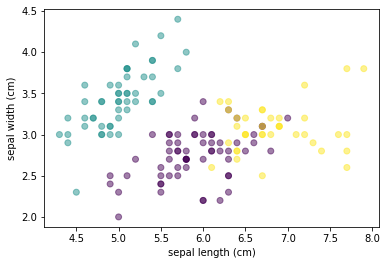

In [19]:
new_labels = model.predict(new_samples)
 
print(new_labels) 
# plot and Visualize
x = samples[:,0]
y = samples[:,1]
 
plt.scatter(x, y, c=labels, alpha=0.5)
 
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
 
plt.show()

According to the metadata:

All the 0‘s are Iris-setosa
All the 1‘s are Iris-versicolor
All the 2‘s are Iris-virginica
Let’s change these values into the corresponding species using the following code:

In [21]:
#evaluation
#
import pandas as pd

target = iris.target

species = np.chararray(target.shape, itemsize=150)
 
for i in range(len(samples)):
    if target[i] == 0:
        species[i] = 'setosa'
    elif target[i] == 1:
        species[i] = 'veriscolor'
    elif target[i] == 2: 
        species[i] = 'virginica'
        
df = pd.DataFrame({'labels': labels, 'species': species})
 
print(df)

#crosstab- allows to examine the relationships within the data that is not readily apparent

ct = pd.crosstab(df['labels'], df['species'])
print(ct)


     labels       species
0         1     b'setosa'
1         1     b'setosa'
2         1     b'setosa'
3         1     b'setosa'
4         1     b'setosa'
..      ...           ...
145       2  b'virginica'
146       0  b'virginica'
147       2  b'virginica'
148       2  b'virginica'
149       0  b'virginica'

[150 rows x 2 columns]
species  b'setosa'  b'veriscolor'  b'virginica'
labels                                         
0                0             48            14
1               50              0             0
2                0              2            36


# How to know the number of clusters

# from sklearn import datasets
from sklearn.cluster import KMeans

iris = datasets.load_iris()

samples = iris.data

num_clusters = list(range(1, 9))
inertias = []

for k in num_clusters:
    model = KMeans(n_clusters=k)
    model.fit(samples)
    inertias.append(model.inertia_)

plt.plot(num_clusters, inertias, '-o')
 
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
 
plt.show()


The goal is to have low inertia and the least number of clusters.

One of the ways to interpret this graph is to use the elbow method: choose an “elbow” in the inertia plot - when inertia begins to decrease more slowly.

In the graph above, 3 is the optimal number of clusters.

# Example-2

In [28]:
digits = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra", header=None)
test_set = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tes", header=None)

In [29]:
digits, test_set

(      0   1   2   3   4   5   6   7   8   9   ...  55  56  57  58  59  60  61  \
 0      0   1   6  15  12   1   0   0   0   7  ...   0   0   0   6  14   7   1   
 1      0   0  10  16   6   0   0   0   0   7  ...   0   0   0  10  16  15   3   
 2      0   0   8  15  16  13   0   0   0   1  ...   0   0   0   9  14   0   0   
 3      0   0   0   3  11  16   0   0   0   0  ...   0   0   0   0   1  15   2   
 4      0   0   5  14   4   0   0   0   0   0  ...   0   0   0   4  12  14   7   
 ...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
 3818   0   0   5  13  11   2   0   0   0   2  ...   0   0   0   8  13  15  10   
 3819   0   0   0   1  12   1   0   0   0   0  ...   0   0   0   0   4   9   0   
 3820   0   0   3  15   0   0   0   0   0   0  ...   0   0   0   4  14  16   9   
 3821   0   0   6  16   2   0   0   0   0   0  ...   0   0   0   5  16  16  16   
 3822   0   0   2  15  16  13   1   0   0   0  ...   0   0   0   4  14   1   0   
 
       62  63 

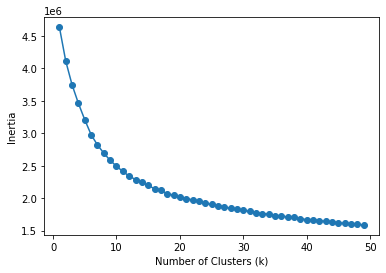

In [30]:
samples = digits
num_clusters = list(range(1, 50))
inertias = []

for k in num_clusters:
    model = KMeans(n_clusters=k)
    model.fit(samples)
    inertias.append(model.inertia_)

plt.plot(num_clusters, inertias, '-o')
 
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
 
plt.show()


In [31]:
model = KMeans(n_clusters=20)
 
model.fit(samples)
 
labels = model.predict(samples)
 
print(labels)

[ 5  5  2 ...  3  3 14]


# Handwriting Recognition

In [33]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
 
digits = datasets.load_digits()
print(digits)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', '

In [34]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [35]:
print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [36]:
print(digits.target)

[0 1 2 ... 8 9 8]


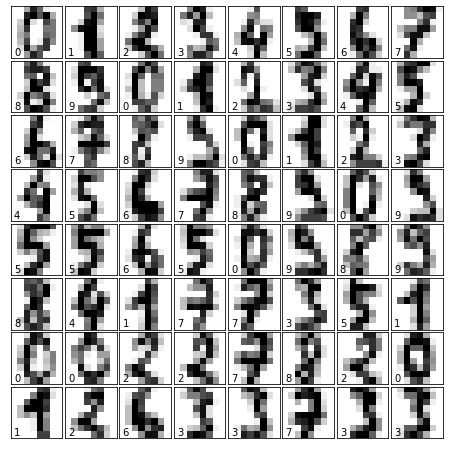

In [37]:
# Visualize the image

# Figure size (width, height)
 
fig = plt.figure(figsize=(6, 6))
 
# Adjust the subplots 
 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
 
# For each of the 64 images
 
for i in range(64):
 
    # Initialize the subplots: add a subplot in the grid of 8 by 8, at the i+1-th position
 
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
 
    # Display an image at the i-th position
 
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
 
    # Label the image with the target value
 
    ax.text(0, 7, str(digits.target[i]))
 
plt.show()

In [38]:
from sklearn.cluster import KMeans

In [39]:
# because we have 10 digits,w e need n_cluster as 10
model = KMeans(n_clusters=10, random_state=42)
model.fit(digits.data)

KMeans(n_clusters=10, random_state=42)

In [40]:
fig = plt.figure(figsize=(8, 3))
 
fig.suptitle('Cluser Center Images', fontsize=14, fontweight='bold')

Text(0.5, 0.98, 'Cluser Center Images')

<Figure size 576x216 with 0 Axes>

In [41]:
for i in range(10):
 
  # Initialize subplots in a grid of 2X5, at i+1th position
  ax = fig.add_subplot(2, 5, 1 + i)
 
  # Display images
  ax.imshow(model.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)
plt.show()

In [43]:
#2221
new_samples1 = np.array([
[0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.69,0.61,0.00,0.00,0.00,0.00,0.00,4.25,7.62,7.62,3.70,0.00,0.00,0.00,0.00,5.33,6.55,5.23,7.62,2.13,0.00,0.00,0.00,4.64,6.24,0.38,7.62,3.58,0.00,0.00,0.00,0.15,0.38,0.07,7.61,3.80,0.00,0.00,0.00,0.00,0.61,6.39,7.62,7.24,6.86,0.00,0.00,0.00,0.30,4.41,4.57,4.27,3.81],
[0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.14,2.29,2.29,1.22,0.00,0.00,0.00,0.00,7.47,7.62,7.62,7.62,6.63,3.80,0.00,0.00,6.77,0.99,1.37,3.04,6.63,7.62,3.79,0.00,6.63,0.45,0.00,0.00,0.15,5.63,6.85,0.00,7.54,7.01,4.49,2.51,2.73,6.78,5.86,0.00,1.52,4.95,7.23,7.62,7.62,6.78,1.73,0.00,0.00,0.00,0.22,0.76,0.76,0.15,0.00,0.00],
[0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.67,4.41,3.80,0.07,0.00,0.00,0.00,0.53,7.54,7.53,7.62,3.11,0.00,0.00,0.00,0.76,7.62,3.04,7.61,4.11,0.00,0.00,0.00,0.30,6.47,2.66,6.46,6.17,0.00,0.00,0.00,0.00,0.00,0.00,4.56,6.85,0.00,0.00,5.18,5.34,5.34,5.41,7.09,6.17,0.00,0.00,5.18,5.34,5.34,5.34,4.87,1.20,0.00,0.00],
[0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.57,5.33,0.00,0.00,0.00,0.00,0.00,0.00,5.33,6.10,0.00,0.00,0.00,0.00,0.00,0.00,5.33,6.10,0.00,0.00,0.00,0.00,0.00,0.00,5.33,6.10,0.00,0.00,0.00,0.00,0.00,0.00,5.33,6.09,0.00,0.00,0.00,0.00,0.00,0.00,2.97,3.50,0.00,0.00,0.00]
])

#2223
new_samples2 = np.array([
[0.00,5.72,7.55,6.64,7.62,4.35,0.00,0.00,0.00,1.68,1.37,0.08,6.10,6.10,0.00,0.00,0.00,0.00,0.08,3.74,7.55,5.03,0.00,0.00,0.00,0.00,4.96,7.62,5.26,0.46,0.00,0.00,0.00,1.14,7.62,4.50,0.00,0.00,0.00,0.00,0.00,2.90,7.62,4.80,3.81,3.81,3.36,0.08,0.00,4.80,7.55,6.86,6.86,6.86,6.41,0.38,0.00,0.23,0.53,0.00,0.00,0.00,0.00,0.00],
[0.00,2.29,7.55,7.62,7.62,7.24,0.99,0.00,0.00,3.58,7.55,1.76,2.21,7.62,2.82,0.00,0.00,0.23,1.30,3.13,6.40,7.62,1.98,0.00,0.00,2.13,6.71,7.62,6.25,2.21,0.00,0.00,1.52,7.55,7.55,5.26,3.05,3.05,3.58,0.46,2.29,7.62,7.62,7.62,7.62,7.62,7.55,1.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00],
[1.98,7.40,7.40,7.40,7.48,3.97,0.00,0.00,0.76,3.74,0.84,1.14,5.65,7.32,0.69,0.00,0.00,0.00,0.00,0.00,1.52,7.55,3.97,0.00,0.00,0.00,0.00,0.00,0.23,7.09,4.58,0.00,0.00,0.15,1.30,3.74,6.94,7.63,2.44,0.00,3.05,7.09,7.62,7.62,7.62,7.47,6.86,4.73,4.04,6.86,6.33,5.34,4.65,4.57,4.04,2.29,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00],
[0.00,2.67,7.09,7.62,7.40,2.82,0.00,0.00,0.00,5.64,6.10,2.75,6.25,6.86,0.00,0.00,0.00,0.31,0.23,1.68,6.03,6.79,0.00,0.00,0.00,1.14,6.63,7.62,7.62,6.94,0.23,0.00,0.00,0.69,4.50,3.89,3.74,7.63,3.74,0.00,0.69,1.98,0.69,0.00,0.38,7.09,4.58,0.00,5.87,7.62,3.89,1.22,6.03,7.55,2.82,0.00,5.56,7.62,7.24,7.62,7.25,2.60,0.00,0.00]
])

new_labels = model.predict(new_samples2)
 
print(new_labels, end='') 


[2 7 7 4]